Deep learning has:
1_Neural network and
2_Feature engineering auto.....

1_Supervised learning: supervisor guides/ is involved e.g. this is cat image>label image>annotate data>label is supervised learning it has more acheivement


2_Unsupervised learning has:
Clustering
Dimentionality Reduction
Clustering is grouping on some similar features any feature could be chosen

3_Reinforcement learning has 4 things:

Environment (physical or virtual): Receive input from environment
Agent
Action
Revote
Self supervised learning: Machine gives labels itself

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("weight-height.csv")

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
Gender    10000 non-null object
Height    10000 non-null float64
Weight    10000 non-null float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [6]:
X=df['Height'].values
y_true=df['Weight'].values
print(X[:5] ,y_true[:5] , sep='\n\n')

[73.84701702 68.78190405 74.11010539 71.7309784  69.88179586]

[241.89356318 162.31047252 212.74085556 220.0424703  206.34980062]


In [7]:
#line Equation
def line(x, w=0, b=0):
    return x * w + b

#Cost Functions
def mean_squared_error(y_true, y_pred):
    s = (y_true - y_pred) ** 2
    return np.sqrt(s.mean())

Text(0.5, 0, 'b')

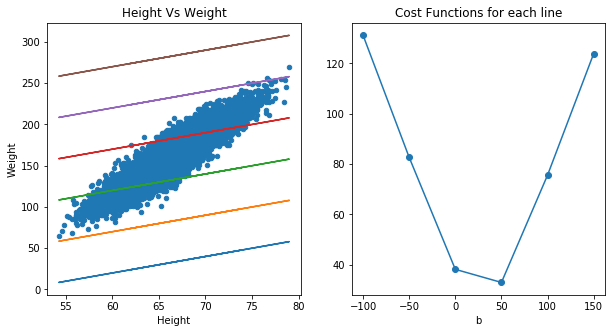

In [12]:
plt.figure(figsize=(10,5))
ax1 = plt.subplot(121) # rows,columns, select column 121
df.plot(kind='scatter',
       x="Height",
       y="Weight",
       title="Height Vs Weight", ax=ax1)


bs = [-100, -50, 0, 50, 100, 150]


mses = []
for b in bs:
    y_pred = line(X, w=2, b=b) # predict line
    mse = mean_squared_error(y_true, y_pred)
    mses.append(mse)
    plt.plot(X, y_pred) 
    
    
ax2 = plt.subplot(122)    
plt.plot(bs, mses, 'o-')
plt.title("Cost Functions for each line")
plt.xlabel("b")


In [13]:
print(bs)
print(mses)

[-100, -50, 0, 50, 100, 150]
[131.1417931672291, 82.62957208407575, 38.17227332081024, 32.96359686320369, 75.60472859445356, 123.87716195296917]


# We have gotten b,w values after runing deep learning algoritham

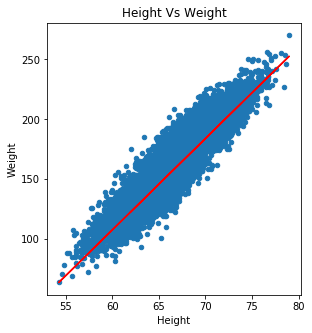

In [14]:
plt.figure(figsize=(10,5))
ax1 = plt.subplot(121) # rows,columns, select column 121
df.plot(kind='scatter',
       x="Height",
       y="Weight",
       title="Height Vs Weight", ax=ax1)




y_pred = line(X, w=7.624642, b=-349.7231) # predict line [[7.624642]] [-349.7231]
plt.plot(X, y_pred, color='red')


# Try to find w and b (weights) with Deep Learning

In [15]:
from tensorflow.keras.models import Sequential #sequential, Functional API
from tensorflow.keras.layers import Dense #each nodes connected with others nodes
from tensorflow.keras.optimizers import Adam, SGD

In [16]:
import tensorflow
tensorflow.__version__
#pip install tensorflow

'2.1.0'

In [18]:
X.shape

(10000,)

In [19]:
model = Sequential()
model.add(Dense(1, input_shape=(1,)))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(Adam(lr=0.8), 'mean_squared_error')

In [22]:
model.fit(X, y_true, epochs=45)

Train on 10000 samples
Epoch 1/45
10000/10000 [==============================] - 5s 489us/sample - loss: 653.7156
Epoch 2/45
10000/10000 [==============================] - 1s 69us/sample - loss: 543.0043
Epoch 3/45
10000/10000 [==============================] - 1s 82us/sample - loss: 478.0949
Epoch 4/45
10000/10000 [==============================] - 1s 55us/sample - loss: 416.3591
Epoch 5/45
10000/10000 [==============================] - 1s 70us/sample - loss: 380.8579
Epoch 6/45
10000/10000 [==============================] - 1s 108us/sample - loss: 343.4558
Epoch 7/45
10000/10000 [==============================] - 1s 149us/sample - loss: 312.0931
Epoch 8/45
10000/10000 [==============================] - 1s 119us/sample - loss: 273.8020
Epoch 9/45
10000/10000 [==============================] - 1s 71us/sample - loss: 255.7095
Epoch 10/45
10000/10000 [==============================] - 1s 64us/sample - loss: 240.2783
Epoch 11/45
10000/10000 [==============================] - 1s 76us/sampl

In [23]:

y_pred_deep_learning = model.predict(X)
y_pred_deep_learning

array([[219.802  ],
       [180.73328],
       [221.8313 ],
       ...,
       [142.83081],
       [182.67963],
       [127.99237]], dtype=float32)

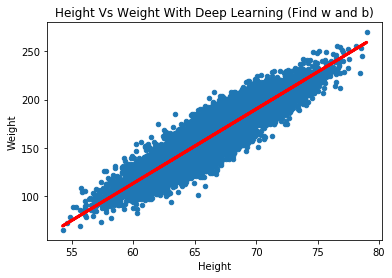

In [24]:
df.plot(kind='scatter',
       x='Height',
       y="Weight",
       title="Height Vs Weight With Deep Learning (Find w and b)")
plt.plot(X, y_pred_deep_learning, color='red', linewidth=3)

In [25]:
w, b = model.get_weights()
print(w, b)

[[7.7132993]] [-349.80212]


In [26]:
model.predict([[200]])

array([[1192.8578]], dtype=float32)

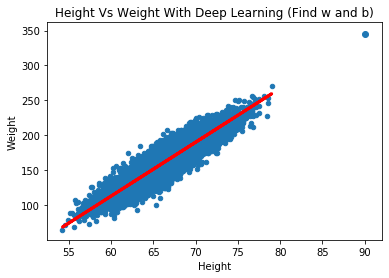

In [27]:
df.plot(kind='scatter',
       x='Height',
       y="Weight",
       title="Height Vs Weight With Deep Learning (Find w and b)")
plt.plot(X, y_pred_deep_learning, color='red', linewidth=3)
i = 90
plt.scatter(i, model.predict([[i]]))

In [ ]:
if you have'nt installed tensorflow in your local machine so follow these steps: 1) go to colab.com 2) import tensorflow 3) tensorflow.__version__ 4) !pip install --upgrade tensorflow 3) tensorflow.__version__